In [2]:
from keras.datasets import mnist

(train_data,e),(test_data,e)=mnist.load_data()

train_data=train_data/255.0
test_data=test_data/255.0

In [5]:
import numpy as np

train_data=train_data.reshape(train_data.shape[0],
                              train_data.shape[1],
                              train_data.shape[2],1)

test_data=test_data.reshape(test_data.shape[0],
                              test_data.shape[1],
                              test_data.shape[2],1)

In [13]:
train_data_noisy=train_data+0.5*np.random.normal(loc=0,scale=1,
                                        size=train_data.shape)

test_data_noisy=test_data+0.5*np.random.normal(loc=0,scale=1,
                                        size=test_data.shape)

#adding random noise to the digits from gaussian distribution

train_data_noisy=np.clip(train_data_noisy,0,1)
test_data_noisy=np.clip(test_data_noisy,0,1)

#clipping the pixels values greater than 1 and less than 0

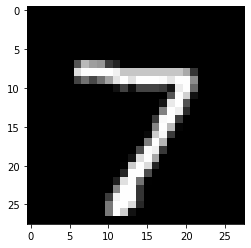

In [14]:
from matplotlib import pyplot as plt

plt.imshow(test_data[0].reshape(28,28),cmap='gray')

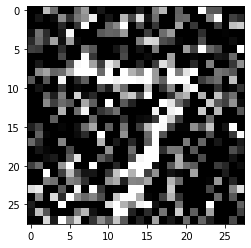

In [15]:
plt.imshow(test_data_noisy[0].reshape(28,28),cmap='gray')

In [20]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as K

input_layer=Input(shape=train_data.shape[1:])

model=Conv2D(32,(3,3),activation='relu',padding='same')(input_layer)
model=MaxPooling2D((2,2),padding='same')(model)
model=Conv2D(32,(3,3),activation='relu',padding='same')(model)

encoder=MaxPooling2D((2,2),padding='same')(model)
#Bottle neck/ Latent Space

model=Conv2D(32,(3,3),activation='relu',padding='same')(encoder)
model=UpSampling2D((2,2))(model) #inverse of pooling
model=Conv2D(32,(3,3),activation='relu',padding='same')(model)
model=UpSampling2D((2,2))(model)

decoder=Conv2D(1,(3,3),activation='relu',padding='same')(model)

autoencorder=Model(input_layer,decoder) #building the NN

autoencorder.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
history=autoencorder.fit(train_data_noisy,train_data,epochs=100,
                         validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
22080/54000 [===========>..................] - ETA: 6:37 - loss: 0.2056